# PCA

# Old

https://www.pythonmorsels.com/making-auto-updating-attribute/

In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from chemtools.exploration import PrincipalComponentAnalysis as pca

In [ ]:
f = "icp.xlsx"
data = pd.ExcelFile(f)

shet = widgets.Dropdown(
    options=data.sheet_names,
    description='Data sheet:',
    disabled=False,
)
display(shet)


Dropdown(description='Data sheet:', options=('MATRICE DEI DATI',), value='MATRICE DEI DATI')

In [ ]:
df = pd.read_excel(f, sheet_name=shet.value)
df


,CAMPIONI,Cr,Cu,Mo,Mn,Ni,Pb,V
0,graffetta,0.012097,0.012704,0.002444,0.208169,0.017511,0.002835,0.000049
1,orologio,0.034978,0.172011,0.010050,0.529800,0.069733,0.005294,0.001963
2,filo,13.853548,0.256657,1.849671,1.210907,5.640097,0.002278,0.043808
3,taglierino,0.048148,0.048881,0.008404,0.643808,0.048588,0.003300,0.064381
4,fascetta,0.306884,0.005591,0.003174,0.241652,0.018525,0.003074,0.003807
5,foglio,13.250971,0.060986,0.012153,0.419739,0.105570,0.002260,0.094532
6,siringa,15.549177,0.250666,0.368831,1.734079,7.103451,0.001649,0.052999
7,spillo,0.031947,0.024526,0.007279,0.550200,2.020916,0.004162,0.001548
8,filo_2,0.047820,0.049092,0.008041,0.108227,0.049431,0.003818,0.047703
9,lama,9.996651,0.012189,0.022664,0.702806,0.084975,0.003147,0.026613


In [ ]:
pca=pca(df, variable_name_column=[1,7], sample_name_row=["CAMPIONI"])

In [ ]:
np.argmax(pca.PC_index[2, :] < pca.PC_index[2, :].mean())

2

In [ ]:
pca.eigenvalues_plot()

## Altri parametri PCA per numero minimo di PC

In [ ]:
from chemtools.preprocessing import matrix_variance

In [ ]:
sum_eig=pca.V.sum()
print(sum_eig)
exp_var=pca.V/sum_eig
print(exp_var)
mean_eig=pca.V.mean()
print(mean_eig)
num = sum(abs(exp_var - (mean_eig/sum_eig)))
print(num)
den = den = 2*(sum_eig - mean_eig)/sum_eig
print(den)
K=(num/den)
print(K)
print("\n")
KLtmp = (1 + (p-1)*(1-K))
print(KLtmp)
KL = round(KLtmp)
print(KL)
KPtmp = pca.V.size ** (1-K)
KP = round(KPtmp)
print(KP)


6.000000000000001
[0.62261273 0.20125269 0.082616   0.05619659 0.0088393  0.02848269]
1.0000000000000002
0.9810641755348972
1.6666666666666667
0.5886385053209383




NameError: name 'p' is not defined

In [ ]:
variance_m=matrix_variance(pca.x)
variance_m

array([[ 0.16666667,  0.09464552,  0.09326822,  0.1091773 ,  0.11401943,
        -0.03739764],
       [ 0.09464552,  0.16666667,  0.1147372 ,  0.13650438,  0.13038941,
         0.02203795],
       [ 0.09326822,  0.1147372 ,  0.16666667,  0.08721288,  0.11663185,
        -0.01829091],
       [ 0.1091773 ,  0.13650438,  0.08721288,  0.16666667,  0.13727747,
         0.04135398],
       [ 0.11401943,  0.13038941,  0.11663185,  0.13727747,  0.16666667,
        -0.02860526],
       [-0.03739764,  0.02203795, -0.01829091,  0.04135398, -0.02860526,
         0.16666667]])

In [ ]:
eigenvalue=pca.V
p = pca.V.size
x=pca.correlation_matrix
j= pca.V.size

In [ ]:
n = np.linalg.matrix_rank(variance_m)
n

6

In [ ]:
EV=[]
for i in range(pca.V.size):
    EV = np.append(EV,eigenvalue[i]/(eigenvalue.sum()))
EV


array([0.62261273, 0.20125269, 0.082616  , 0.05619659, 0.0088393 ,
       0.02848269])

In [ ]:
(EV-(1/(pca.V.size))).sum() #numeratore


0.0

In [ ]:
2*(pca.V.size-1)/pca.V.size #denominatore


1.6666666666666667

In [ ]:
K=(EV-1/(pca.V.size)).sum()/(2*(pca.V.size-1)/pca.V.size)
k


NameError: name 'k' is not defined

In [ ]:
round(1+(j-1)*(1-k))


NameError: name 'k' is not defined

In [ ]:
a = sum(eigenvalue[m]/eigenvalue.sum()-1/p for m in range(n))
a

0.0

In [ ]:
k=(a+(p-n)**(1/p))/(2*(p-1)/p)
k

0.0

In [ ]:
kl=round(1+(j-1)*(1-k))
kl

6

In [ ]:
kp=round(j**(1-k))
kp

6

https://www.sciencedirect.com/science/article/pii/S0169743998001245
https://www.academia.edu/6648469/The_K_correlation_index_theory_development_and_its_application_in_chemometrics
https://www.youtube.com/watch?v=JtrPvAdVJiM&ab_channel=Mattoscacco

# New

In [1]:
def set_variables_names(X, variables_names):
    if variables_names is None:
        n = X.shape[1]
        variables = [str(i) for i in range(n)]
    else:
        variables = variables_names
        return variables
def set_objects_names(X, objects_names):
    if objects_names is None:
        n = X.shape[0]
        objects = [str(i) for i in range(n)]
    else:
        objects = objects_names
    return objects



In [20]:
import pandas as pd
import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from chemtools.preprocessing import autoscaling
from chemtools.preprocessing.matrix_standard_deviation import matrix_standard_deviation
from chemtools.preprocessing import correlation_matrix
from chemtools.preprocessing import diagonalized_matrix
from chemtools.utility import reorder_array
from chemtools.utility import heatmap
from chemtools.utility import annotate_heatmap

class PrincipalComponentAnalysis:
    def __init__(self,X, variables_names=None, objects_names=None):
        self.X=X
        self.variables=set_variables_names(self.X,variables_names)
        self.objects=set_objects_names(self.X,objects_names)
        self.n_variables=self.X.shape[1]
        self.n_objects=self.X.shape[0]
    
    def fit(self):
        # Calcola la media
        self.mean = np.mean(self.X, axis=0)
        #calcola le deviazioni standard della matrice
        self.std=matrix_standard_deviation(self.X, mode="column")
        # Calcola la matrice autoscalata
        self.X_autoscaled = autoscaling(self.X)
        #Calcola la matrice do covarianza
        self.correlation_matrix = correlation_matrix(self.X_autoscaled)
        # eighenvalue enighenvector
        self.V, self.L = diagonalized_matrix(self.correlation_matrix)
        self.V_ordered, self.order = reorder_array(self.V)
        
        # riordino le PCi
        PC_index = np.array([["PC{}".format(i+1) for i in range(self.V.shape[0])], self.order, self.V_ordered])
        self.PC_index = PC_index
        self.number_of_PC = self.L.shape[1]
        
        self.L_ordered=self.L[self.order]
        # Criteri scelta nPC
        self.num_eigenvalues_greater_than_one=np.argmax(pca.V_ordered < 1)
    
    def reduction(self, n_components):
        self.n_component = n_components
        self.V_reduced=self.V_ordered[:n_components]
        # Calcola la matrice di trasformazione
        self.W = self.L_ordered[:, :n_components]
        # Riduce la dimensionalità dei dati
        self.T = np.dot(self.X_autoscaled, self.W)
    
    def statistics(self,alpha=0.05):
        self.X_reconstructed = np.dot(self.T, self.W.T)
        self.E = self.X_autoscaled - self.X_reconstructed
        self.T2 = np.diag(self.T @ np.diag(self.V_ordered[:self.n_component] ** (-1)) @ self.T.T)
        self.T2con = self.T @ np.diag(self.V_ordered[:self.n_component] ** (-1 / 2)) @ self.W.T
        self.Q = np.sum(self.E ** 2, axis=1)
        self.Qcon = self.E
        self.T2_critical_value=self.hotellings_t2_critical_value(alpha=alpha)
    

    def hotellings_t2_critical_value(self, alpha=0.05):
        p = self.n_variables
        n = self.n_objects
        f_critical_value = f.ppf(1 - alpha, p, n - p)
        return (p * (n - 1)) / (n - p) * f_critical_value

    ### PLots ----------------------------------------------------------------
    def plot_correlation_matrix(self, cmap="coolwarm", threshold=None):
        """_summary_

        Args:
            cmap (str, optional): Colormap color. Defaults to "coolwarm".
                ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys',
                'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn','binary',
                'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn',
                'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
                'twilight', 'twilight_shifted', 'hsv','Pastel1', 'Pastel2',
                'Paired', 'Accent', 'Dark2',
                'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain',
                'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
                'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet',
                'turbo', 'nipy_spectral', 'gist_ncar']
            threshold (_type_, optional): Value in data units according to which the colors
                from textcolors are applied.  If None (the default) uses the middle of the
                colormap as separation.  Optional.
            pfig (bool, optional): _description_. Defaults to False.
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        im, cbar = heatmap(self.correlation_matrix, self.variables, self.variables, ax=ax, cmap=cmap, cbarlabel="Correlation value")
        texts = annotate_heatmap(im, threshold=threshold, valfmt="{x:.2f}")
        ax.set_title("Correlation Matrix")
        plt.tight_layout()

    def plot_eigenvalues_greater_than_one(self):
        #plt.figure(figsize=(self.PC_index.shape[1], 5))
        # grafico degli autovalori maggiori di 1
        # da verificare un attimo se non rimane uguale all'autovalore medio
        plt.axvline(
            x=self.num_eigenvalues_greater_than_one-0.5, #lìultimo 1 è la condizione
            color="brown",
            linestyle="-",
            label="Autovalori maggiori di 1",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_eigenvalues_variance(self):
        #plt.figure(figsize=(self.PC_index.shape[1], 5))
        # grafico degli autovalori
        plt.bar(
            x=self.PC_index[0, :],
            height=(self.V_ordered/ self.V_ordered.sum()) * 100,
            fill=False,
            edgecolor="darkorange",
            label="Varianza %",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_cumulative_variance(self):
        c = np.cumsum(self.V_ordered / self.V_ordered.sum()) * 100
        plt.bar(
            x=self.PC_index[0, :],
            height=c,
            fill=False,
            edgecolor="black",
            linestyle="--",
            width=0.6,
            label="Varianza cumulata %",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_average_eigenvalue_criterion(self):
        plt.axvline(
            x=np.argmax(self.V_ordered < self.V_ordered.mean()) - 0.5,
            color="red",
            alpha=0.5,
            linestyle="-",
            label="AEC",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_KP_criterion(self):
        rank = np.linalg.matrix_rank(self.correlation_matrix)
        sum_term = sum(self.V[m] / self.V.sum() - 1 / self.V.size for m in range(rank))
        x = round(1+(self.V.size-1)*(1-((sum_term+(self.V.size-rank)**(1/self.V.size))/(2*(self.V.size-1)/self.V.size))))-1
        plt.axvline(
            x=x,
            color="purple",
            alpha=0.5,
            linestyle="--",
            label="KP",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_KL_criterion(self):
        rank = np.linalg.matrix_rank(self.correlation_matrix)
        sum_term = sum(self.V[m] / self.V.sum() - 1 / self.V.size for m in range(rank))
        x = round(self.V.size**(1-(sum_term+(self.V.size-rank)**(1/self.V.size))/(2*(self.V.size-1)/self.V.size)))-1
        plt.axvline(
            x=x,
            color="cyan",
            alpha=0.5,
            linestyle="-",
            label="KL",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_CAEC_criterion(self):
        plt.axvline(
            x=np.argmax(self.V_ordered < 0.7 * self.V_ordered.mean())-0.5,
            color="blue",
            alpha=0.5,
            linestyle="--",
            label="CAEC",
        )
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")

    def plot_broken_stick(self):
        n = self.V_ordered.shape[0]
        dm = (100 / n) * np.cumsum(1 / np.arange(1, n + 1)[::-1])
        plt.plot(self.PC_index[0, :], dm, color="lightgreen", label="Broken stick")
        plt.xticks(range(self.PC_index.shape[1]), range(1,self.PC_index.shape[1]+1))
        plt.xlabel(r"$PC_i$")
        plt.ylabel(r"$\lambda$%")
        plt.legend(loc="best")
        plt.title("Eigenvalue")
    
    def plot_eigenvalue(self):
        self.plot_eigenvalues_greater_than_one()
        self.plot_eigenvalues_variance()
        self.plot_cumulative_variance()
        self.plot_average_eigenvalue_criterion()
        self.plot_KP_criterion()
        self.plot_KL_criterion()
        self.plot_CAEC_criterion()
        self.plot_broken_stick()

    def plot_hotteling_t2_vs_q(self):
        # Calcola Q critico
        #Q_critico =f_value/(self.T.shape[0]-self.T.shape[1])
        # Crea il grafico
        for i in range(len(self.Q)):
            plt.plot(self.Q[i], self.T2[i], 'o', label=self.objects[i])
        # Aggiungi il valore di T2 critico
        #plt.axhline(y=T2_critico, color='r', linestyle='-', label=r"$T^2_{crit}$")
        # Aggiungi il valore di Q critico
        #plt.axvline(x=Q_critico, color='r', linestyle='-', label=r"$Q_{crit}$")
        plt.xlabel(r'$Q$')
        plt.ylabel(r'$Hotteling\'s T^2$')
        plt.legend(loc="best")

    def plot_pci_contribution(self, text_color="black"):
        for i in range(self.W.shape[1]):
            plt.plot(np.arange(self.n_variables),self.W[:, i],marker="o",markerfacecolor="none",label=f"PC$_{i+1}$")
        plt.title(f"Contributions of the PC$_i$")
        plt.xticks(np.arange(self.n_variables), self.variables)
        plt.legend(labelcolor=text_color)
        plt.xlabel("Variable")
        plt.ylabel("Value of loading")

In [21]:
import numpy as np

n = 10
m = 7
X = np.random.rand(n, m)
X

array([[0.1260448 , 0.59587817, 0.66257952, 0.23675909, 0.33858079,
        0.71085925, 0.90907461],
       [0.45852389, 0.14186083, 0.36964145, 0.22096865, 0.02988953,
        0.21223724, 0.74950164],
       [0.04377749, 0.51023273, 0.63132159, 0.51451932, 0.57012741,
        0.50098985, 0.40421292],
       [0.50369028, 0.65144241, 0.46619063, 0.3292257 , 0.95796491,
        0.5489219 , 0.80120335],
       [0.05855644, 0.58299298, 0.4143239 , 0.90117696, 0.195852  ,
        0.41848794, 0.59016871],
       [0.70968468, 0.02565437, 0.7049892 , 0.98985256, 0.70413744,
        0.87113816, 0.44266724],
       [0.1112798 , 0.91473441, 0.05703345, 0.66573038, 0.17179616,
        0.19956205, 0.74020504],
       [0.5478295 , 0.3480536 , 0.54526865, 0.94253586, 0.87389958,
        0.71718957, 0.74767998],
       [0.5101454 , 0.62602832, 0.22973872, 0.1641747 , 0.45377617,
        0.81405562, 0.53361167],
       [0.93286916, 0.60143479, 0.52148836, 0.11913704, 0.07543982,
        0.37848978, 0.2

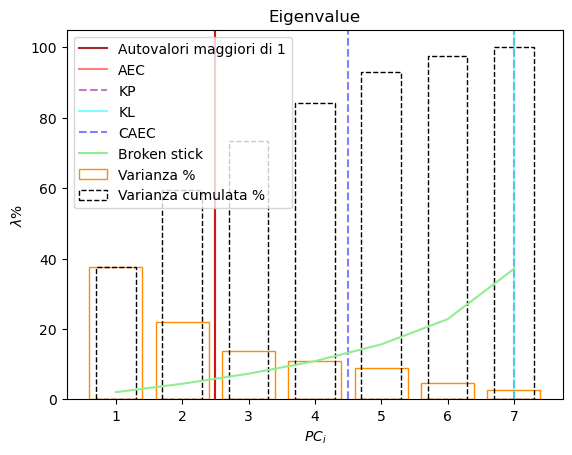

In [22]:
pca=PrincipalComponentAnalysis(X)
pca.fit()
#pca.plot_correlation_matrix()
pca.plot_eigenvalue()

In [23]:
pca.reduction(4)
pca.statistics()

In [24]:
pca.T

array([[-0.89608617, -0.72140959,  0.16244938, -1.24938199],
       [ 0.04080433,  1.85860625,  1.09750191, -0.7061511 ],
       [ 0.36587448, -1.09692507,  1.32802101,  0.51885823],
       [-1.20508934,  0.14385303, -0.84054654,  0.63274726],
       [ 1.33881753, -0.99584151,  0.20313758, -0.24038058],
       [-1.7922162 , -1.154267  ,  0.28640721,  0.55801457],
       [ 2.4522609 ,  0.42415241, -1.07643231,  0.00441766],
       [-1.59560546, -1.05309433, -0.84668891,  0.57155396],
       [ 0.35523206,  0.68942681, -0.92011779,  0.6256682 ],
       [ 0.93600787,  1.90549899,  0.60626848, -0.7153462 ]])

<BarContainer object of 7 artists>

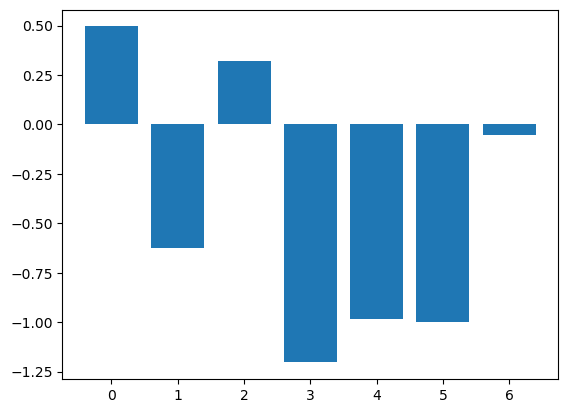

In [25]:
plt.bar(([0,1,2,3,4,5,6]),pca.T2con[1,:])

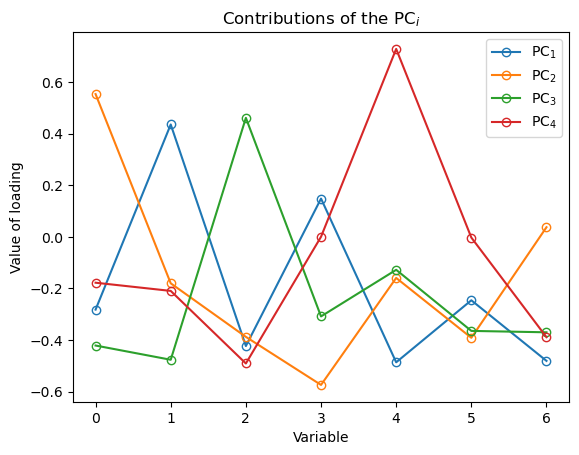

In [26]:
pca.plot_pci_contribution()



In [9]:
#Sì, posso convertire il codice MATLAB in codice Python. Ecco un esempio di come potrebbe essere fatto:
from scipy.stats import f, norm
import numpy as np

lev_conf = 0.95
comp = pca.n_component # insert the value of comp here
nobj = pca.n_objects # insert the value of nobj here
E = np.diag(pca.V_ordered[:pca.n_component]**(2/(nobj-1)))# insert the values of E here

# T2 limit
F = f.ppf(lev_conf, comp, nobj - comp)
tlim = comp * (nobj - 1) / (nobj - comp) * F

# Q limit
t1 = np.sum(E[comp:] ** 1)
t2 = np.sum(E[comp:] ** 2)
t3 = np.sum(E[comp:] ** 3)
ho = 1 - (2 * t1 * t3) / (3 * t2 ** 2)
ca = norm.ppf(0.95, 0, 1)
term1 = (ho * ca * (2 * t2) ** 0.5) / t1
term2 = (t2 * ho * (ho - 1)) / (t1 ** 2)
qlim = t1 * (term1 + 1 + term2) ** (1 / ho)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2072\1787670839.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ho = 1 - (2 * t1 * t3) / (3 * t2 ** 2)


In [10]:
print(tlim)

27.20206170165146


In [11]:
print(t1)

0.0


In [12]:
np.sum(E[comp:] ** 1)E[comp:] ** 2

SyntaxError: invalid syntax (2939310204.py, line 1)

In [ ]:
E[comp:] ** 2

array([], shape=(0, 4), dtype=float64)

In [ ]:
def hotellings_t2_critical_value(pca, alpha):
    p = pca.n_variables
    n = pca.n_objects
    f_critical_value = f.ppf(1 - alpha, p, n - p)
    T2_critical_value = (p * (n - 1)) / (n - p) * f_critical_value
    return T2_critical_value

In [ ]:
hotellings_t2_critical_value(pca=pca, alpha=0.5)

24.111761370660588